In [ ]:
from sklearn import datasets
import numpy as np
digits_dataset = datasets.load_digits()
digits_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dataset['images'].shape

(1797, 8, 8)

In [11]:
digits_dataset['target'][0]

0

In [6]:
digits_dataset['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

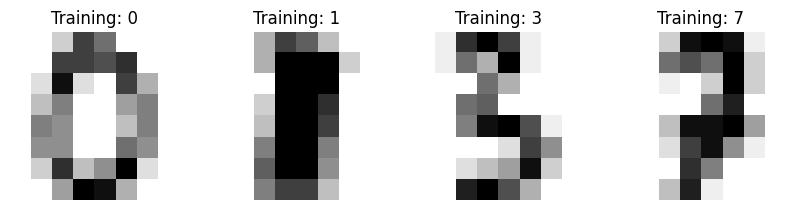

In [9]:
import matplotlib.pyplot as plt
from random import randint

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

for ax in axes:
    num = randint(0, 1000)
    image = digits_dataset['images'][num]
    label = digits_dataset['target'][num]
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X = digits_dataset['data']
y = digits_dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [13]:
from sklearn.linear_model import LogisticRegression

logreg_softmax = LogisticRegression(solver='sag', multi_class='multinomial', max_iter=1000)
logreg_softmax.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='sag')

In [15]:
print("예측 결과: ", logreg_softmax.predict(X_train[1,:].reshape(1, -1)))
print("실제 정답 :  ", y_train[1])

예측 결과:  [0]
실제 정답 :   0


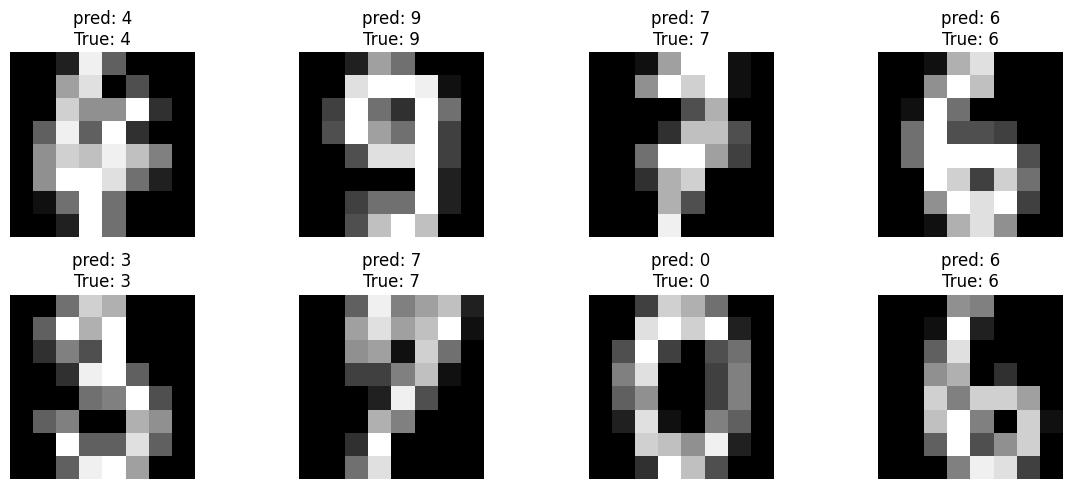

In [21]:
y_pred = logreg_softmax.predict(X_test)

fig, axes = plt.subplots(2, 4, figsize=(12, 5))
axes = axes.ravel()  # 평탄화

for i in range(8):
    axes[i].imshow(X_test[i].reshape(8, 8), cmap="gray")
    axes[i].set_title(f"pred: {y_pred[i]}\nTrue: {y_test[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.96      0.95      0.95        55
           2       0.98      1.00      0.99        47
           3       0.98      0.98      0.98        47
           4       0.95      0.97      0.96        40
           5       0.95      0.90      0.92        40
           6       0.96      0.98      0.97        45
           7       1.00      0.98      0.99        44
           8       0.96      0.98      0.97        47
           9       0.92      0.94      0.93        48

    accuracy                           0.96       450
   macro avg       0.97      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [28]:
y_test = [2,0,3,1]
y_test_bin = [
    [0,0,1,0],
    [1,0,0,0],
    [0,0,0,1],
    [0,1,0,0]
]
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import numpy as np
y_test_bin = label_binarize(y_test, classes=np.arange(10))
y_score = logreg_softmax.predict_proba(X_test)

In [29]:
y_score = logreg_softmax.predict_proba(X_test)

NameError: name 'fpr' is not defined

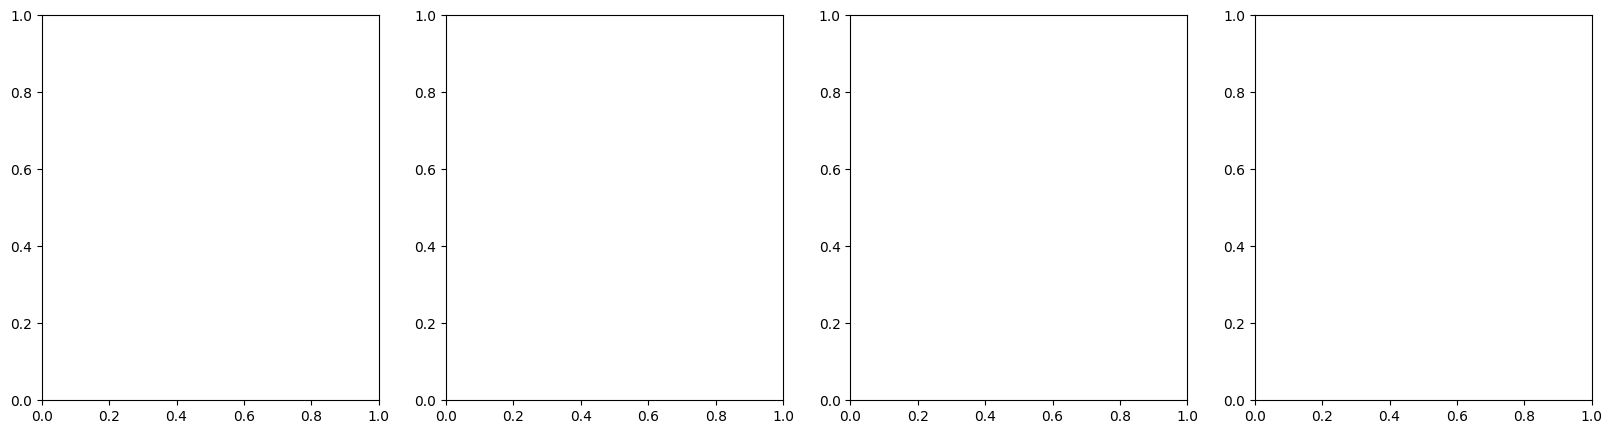

In [30]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

selected_classes = [1,4,5,8]

for plot_idx , class_idx in enumerate(selected_classes):
    RocCurveDisplay.from_predictions(
        fpr=fpr[class_idx],
        tpr=tpr[class_idx],
        roc_auc=roc_auc[class_idx],
        estimator_name=f"Class {class_idx}",
    ).plot(ax=axes[plot_idx])
    axes[plot_idx].set_title(f"ROC Curve for Class {class_idx}")
plt.subtutlef("ROC Curves for Multi-Class Classification")
plt.tight_layout()
plt.show()